# Naive Bayes
You should build a machine learning pipeline using a naive bayes model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a naive bayes model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv")
df.head(), df.info(), df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


(      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0  31953      5       0       0       0       0       0       0       0   
 1  34452      8       0       0       0       0       0       0       0   
 2  60897      5       0       0       0       0       0       0       0   
 3  36953      0       0       0       0       0       0       0       0   
 4   1981      3       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel781  pixel782  pixel783  pixel784  
 0         0         

In [3]:
df = df.drop(columns=['id'])

x = df.drop(columns=['class'])
y = df['class']

In [4]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB()

In [8]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}%\n")
print("Classification Report:\n", report)

Accuracy: 63.74999999999999%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        75
           1       0.71      0.94      0.81        97
           2       0.79      0.28      0.42        78
           3       0.74      0.48      0.58        84
           4       0.81      0.30      0.44        74
           5       0.50      0.07      0.12        73
           6       0.67      0.96      0.79        78
           7       0.89      0.84      0.86        85
           8       0.35      0.60      0.44        83
           9       0.50      0.88      0.64        73

    accuracy                           0.64       800
   macro avg       0.67      0.63      0.59       800
weighted avg       0.68      0.64      0.60       800



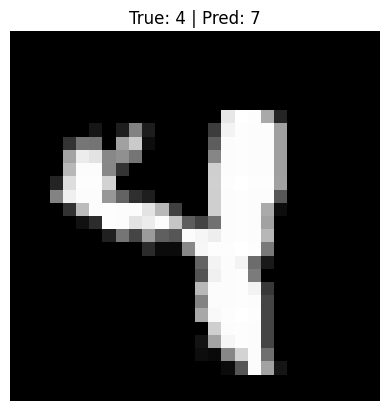

In [15]:
index = np.random.choice(len(x_test), 1, replace=False)[0]
image = x_test[index].reshape(28, 28)
true_label = y_test.iloc[index]
predicted_label = y_pred[index]

plt.imshow(image, cmap='gray')
plt.title(f"True: {true_label} | Pred: {predicted_label}")
plt.axis('off')
plt.show()